# Lab 4: Supervised Learning – Binary Classification

### Dataset Description
Dataset: default of credit card clients.csv  
https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset

This dataset contains information on credit card clients and whether they defaulted on payments. It includes demographic, financial, and repayment history features.

Key Attributes:
- LIMIT_BAL: Credit limit (numeric)
- SEX: Gender (1 = male; 2 = female)
- EDUCATION: Education level
- MARRIAGE: Marital status
- AGE: Age in years
- PAY_0 to PAY_6: History of past monthly payments
- BILL_AMT1 to BILL_AMT6: Amount of bill statement
- PAY_AMT1 to PAY_AMT6: Amount paid in previous months
- default.payment.next.month: Target (1 = default, 0 = no default)

Note: This dataset is imbalanced. About 77% of clients did not default while 23% did.

### Imports

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix
)

## Exercise 1: Data Understanding and Preprocessing

### 1. Load the dataset and display its shape, info, and summary statistics.

In [2]:
df = pd.read_csv('datasets/UCI_Credit_Card.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
df = df.drop(columns=['ID'])

In [4]:
df.shape

(30000, 24)

In [5]:
df = df.rename(columns={'PAY_0': 'PAY_1'})

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_1                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

In [7]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### 2. Identify and convert categorical columns (e.g., SEX, EDUCATION, MARRIAGE) using Label Encoding or One-Hot Encoding.

In [8]:
one_hot_cols = ["SEX", "EDUCATION", "MARRIAGE"]
label_encoded_cols = [f"PAY_{i}" for i in range(7)]

In [9]:
df_encoded = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

In [10]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [11]:
df['PAY_1'].value_counts()

PAY_1
 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: count, dtype: int64

PAY_* cols are already in label encoded format so we don't need to encode them again

In [12]:
le = LabelEncoder()
pd.DataFrame(le.fit_transform(df['PAY_1'])).value_counts()

0 
2     14737
1      5686
3      3688
0      2759
4      2667
5       322
6        76
7        26
10       19
8        11
9         9
Name: count, dtype: int64

### 3. Check for missing values or duplicates and handle them appropriately.

In [13]:
df.isnull().sum().sum()

np.int64(0)

In [14]:
df.shape

(30000, 24)

In [15]:
df = df.drop_duplicates()
df.shape

(29965, 24)

### 4. Normalize/standardize numerical features (LIMIT_BAL, AGE, BILL_AMT*, PAY_AMT*).

In [16]:
standardize_cols = [
    "LIMIT_BAL",
    "AGE",
    "BILL_AMT1", "BILL_AMT2", "BILL_AMT3",
    "BILL_AMT4", "BILL_AMT5", "BILL_AMT6"
]
normalize_cols = [
    "PAY_AMT1", "PAY_AMT2", "PAY_AMT3",
    "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"
]

In [17]:
sc = StandardScaler()
minMax = MinMaxScaler()

In [18]:
for col in standardize_cols:
    df[col] = sc.fit_transform(df[[col]])

In [19]:
for col in normalize_cols:
    df[col] = minMax.fit_transform(df[[col]])

In [20]:
df[standardize_cols].head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
0,-1.136285,-1.246078,-0.643117,-0.648006,-0.668571,-0.673064,-0.663612,-0.653264
1,-0.365619,-1.029141,-0.659830,-0.667347,-0.639841,-0.622219,-0.606802,-0.598525
2,-0.596819,-0.161397,-0.299280,-0.494553,-0.483045,-0.450369,-0.417822,-0.392257
3,-0.905085,0.164007,-0.058284,-0.014093,0.032047,-0.233081,-0.187439,-0.157286
4,-0.905085,2.333368,-0.579253,-0.611935,-0.161927,-0.347669,-0.348795,-0.332130


In [21]:
df[normalize_cols].head()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783
2,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458
3,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892
4,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284


### 5. Split the data into training and testing sets (e.g., 80:20).

In [22]:
X = df.drop(columns=['default.payment.next.month'])
y = df['default.payment.next.month']

In [23]:
X.shape, y.shape

((29965, 23), (29965,))

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
X_train.shape, y_train.shape

((23972, 23), (23972,))

In [26]:
X_test.shape, y_test.shape

((5993, 23), (5993,))

## Exercise 2: Model Traning and Evaluation

Train the following classifiers to predict default.payment.next.month:
- Logistic Regression
- K-Nearest Neighbors (use elbow method to choose optimal K)
- Decision Tree Classifier
- Random Forest Classifier
- Support Vector Machine (SVM)

For each model:
- Train the model using the training set.
- Predict on the testing set.

Evaluate using:
- Confusion Matrix
- Accuracy
- Precision
- Recall
- F1-Score
- ROC AUC Score
- Plot the ROC curve.
- Use classification report to summarize results.

In [27]:
# function to plot auc-roc and confusion metrix and print classification report and other metrics and log them in df
def print_and_log_metrics(name, yt, yp, yproba, df, train_or_test=" "):
    acc = accuracy_score(yt, yp)
    prec = precision_score(yt, yp)
    rec = recall_score(yt, yp)
    f1 = f1_score(yt, yp)
    auc_score = roc_auc_score(yt, yproba)

    print(f"=== {name} {train_or_test}: Classification Report ===")
    print(classification_report(yt, yp))
    print(f"Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}, AUC: {auc_score:.4f}")

    fpr, tpr, _ = roc_curve(yt, yproba)
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, label=f"{name} {train_or_test} (AUC = {auc_score:.2f})", color='blue')
    plt.plot([0,1], [0,1], linestyle='--', color='grey')
    plt.title(f'{name} {train_or_test} - ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

    cm = confusion_matrix(yt, yp)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{name} {train_or_test} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print('\n\n')
    metrics_df = pd.DataFrame([{
        "Model": name,
        "y_true": yt,
        "y_predicted": yp,
        "y_proba": yproba,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1,
        "ROC AUC": auc_score,
        "Comfusion Matrix": cm
     }])

    return pd.concat([df, metrics_df], ignore_index=True)

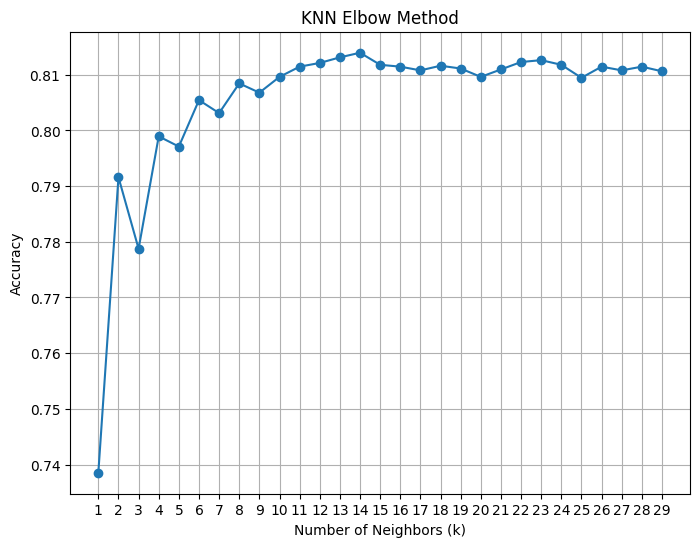

In [28]:
# useing elbow method to choose optimal K
k_values = range(1, 30)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

plt.figure(figsize=(8,6))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.xticks(k_values)
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN Elbow Method")
plt.grid(True)
plt.show()

In [29]:
models = {
    'LogisticRegression' : LogisticRegression(random_state=10),
    'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=14),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=10),
    'RandomForestClassifier': RandomForestClassifier(random_state=10),
    'SVC': SVC(random_state=10)
}

In [30]:
train_metrics = pd.DataFrame(columns=[
    "Model","y_true","y_predicted","y_proba","Accuracy",
    "Precision","Recall","F1 Score","ROC AUC","Comfusion Matrix"
])
test_metrics = pd.DataFrame(columns=[
    "Model","y_true","y_predicted","y_proba","Accuracy",
    "Precision","Recall","F1 Score","ROC AUC","Comfusion Matrix"
])

=== LogisticRegression Test: Classification Report ===
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4671
           1       0.71      0.24      0.36      1322

    accuracy                           0.81      5993
   macro avg       0.76      0.61      0.62      5993
weighted avg       0.79      0.81      0.77      5993

Accuracy: 0.8101, Precision: 0.7054, Recall: 0.2390, F1: 0.3571, AUC: 0.7183


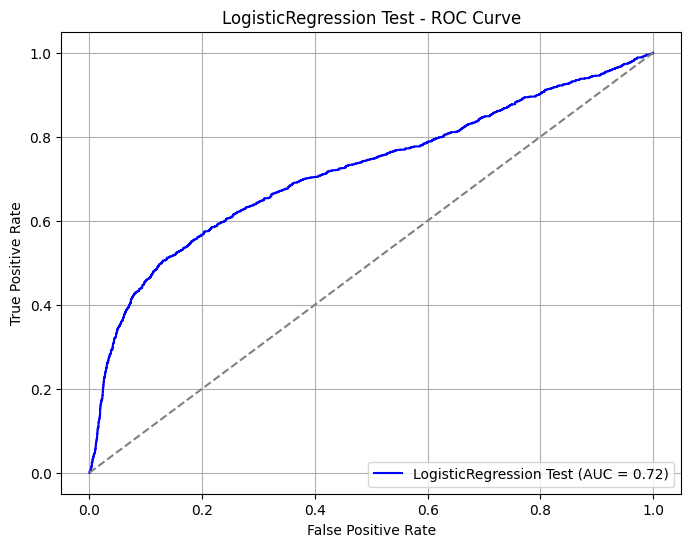

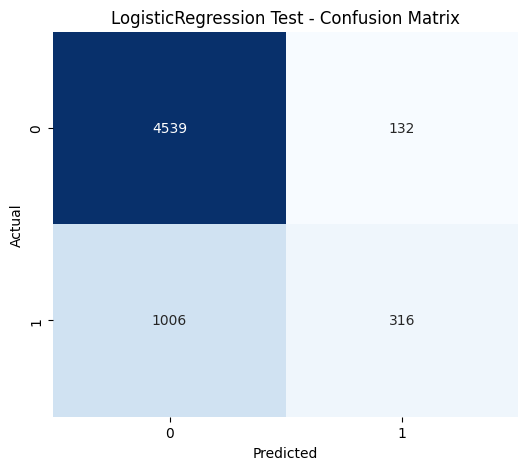




=== LogisticRegression Train: Classification Report ===
              precision    recall  f1-score   support

           0       0.82      0.97      0.89     18664
           1       0.71      0.24      0.36      5308

    accuracy                           0.81     23972
   macro avg       0.77      0.61      0.62     23972
weighted avg       0.80      0.81      0.77     23972

Accuracy: 0.8106, Precision: 0.7140, Recall: 0.2413, F1: 0.3607, AUC: 0.7211


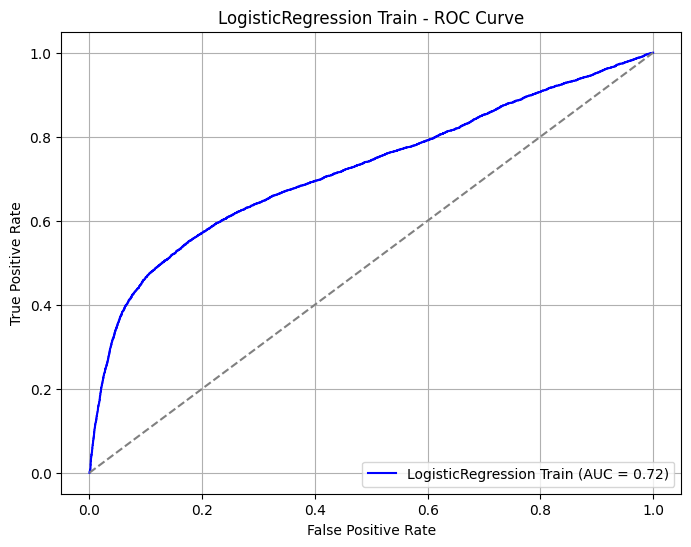

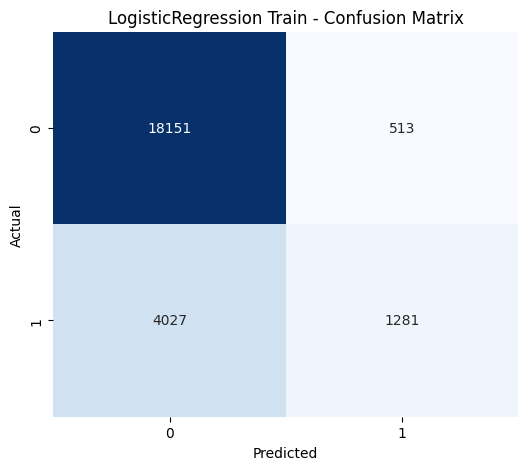




=== KNeighborsClassifier Test: Classification Report ===
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4671
           1       0.66      0.33      0.44      1322

    accuracy                           0.81      5993
   macro avg       0.75      0.64      0.66      5993
weighted avg       0.79      0.81      0.79      5993

Accuracy: 0.8139, Precision: 0.6566, Recall: 0.3283, F1: 0.4377, AUC: 0.7432


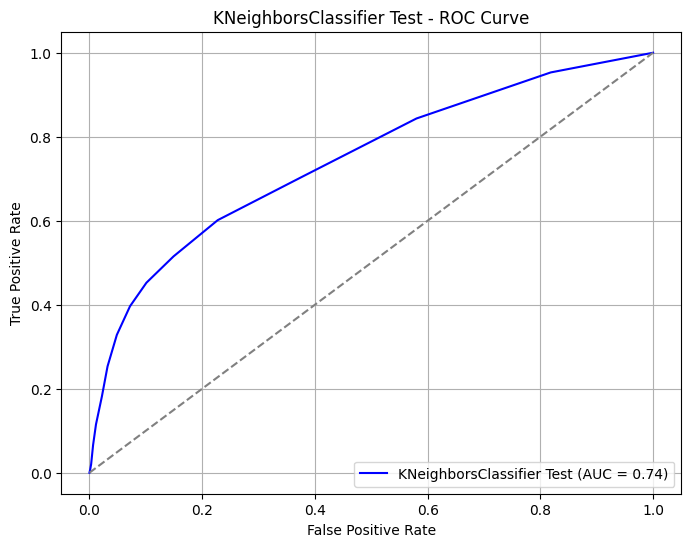

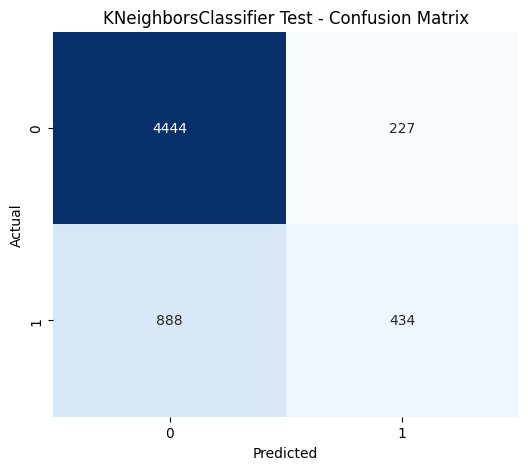




=== KNeighborsClassifier Train: Classification Report ===
              precision    recall  f1-score   support

           0       0.84      0.96      0.89     18664
           1       0.71      0.34      0.46      5308

    accuracy                           0.82     23972
   macro avg       0.77      0.65      0.68     23972
weighted avg       0.81      0.82      0.80     23972

Accuracy: 0.8239, Precision: 0.7114, Recall: 0.3442, F1: 0.4639, AUC: 0.8264


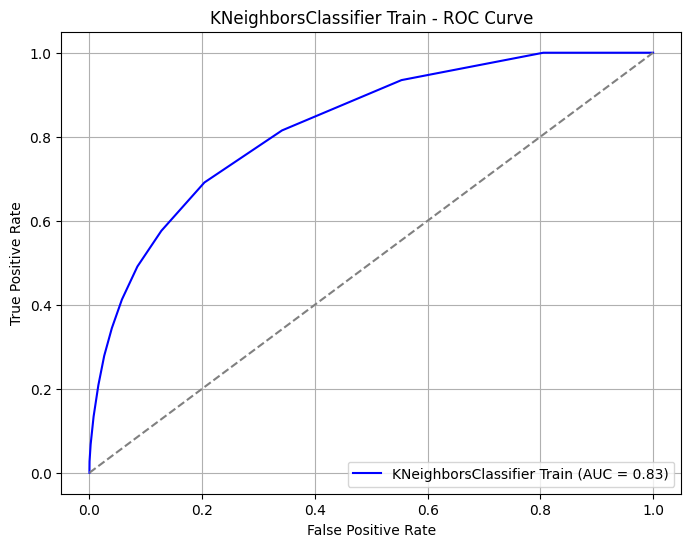

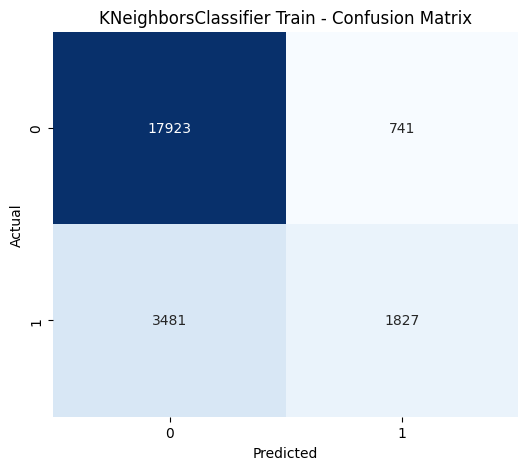




=== DecisionTreeClassifier Test: Classification Report ===
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      4671
           1       0.37      0.40      0.39      1322

    accuracy                           0.72      5993
   macro avg       0.60      0.61      0.60      5993
weighted avg       0.73      0.72      0.72      5993

Accuracy: 0.7200, Precision: 0.3748, Recall: 0.4032, F1: 0.3885, AUC: 0.6066


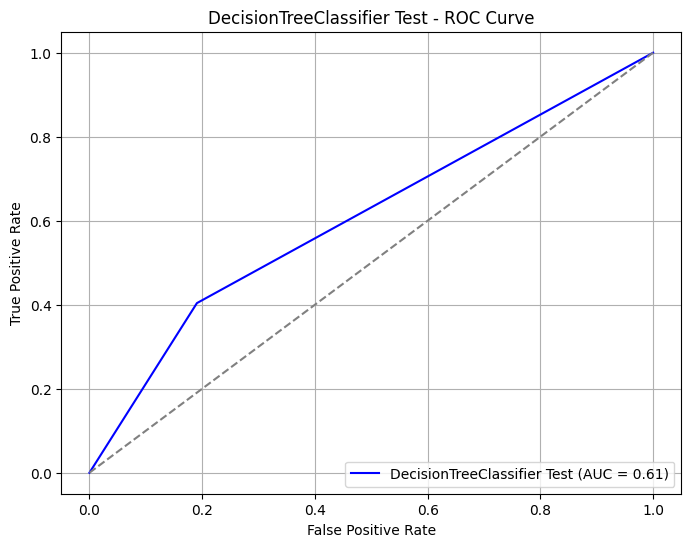

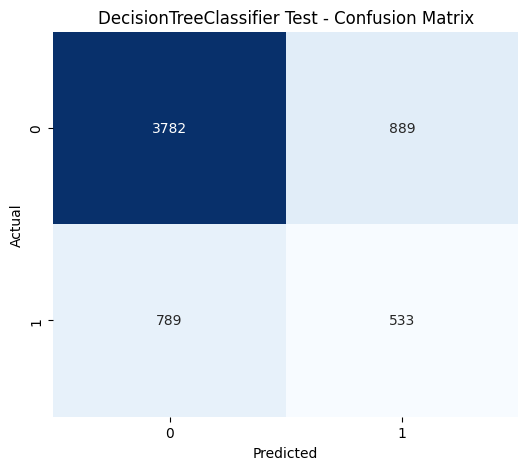




=== DecisionTreeClassifier Train: Classification Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18664
           1       1.00      1.00      1.00      5308

    accuracy                           1.00     23972
   macro avg       1.00      1.00      1.00     23972
weighted avg       1.00      1.00      1.00     23972

Accuracy: 0.9994, Precision: 1.0000, Recall: 0.9972, F1: 0.9986, AUC: 1.0000


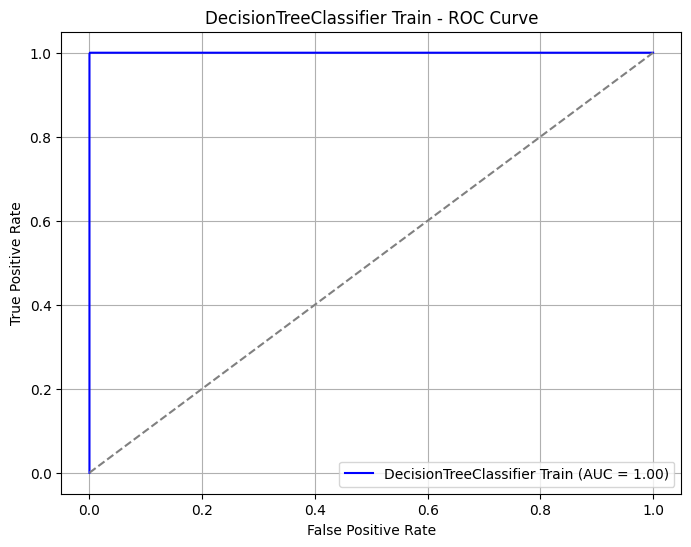

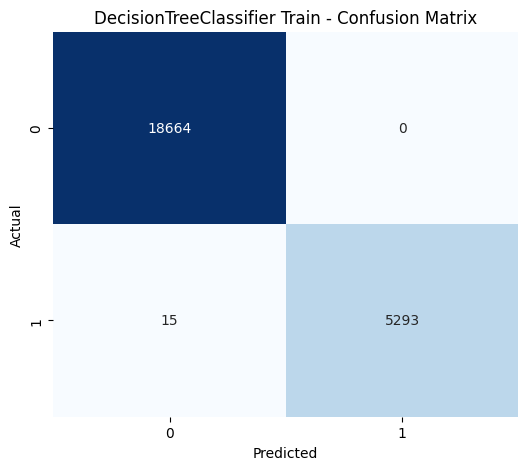




=== RandomForestClassifier Test: Classification Report ===
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4671
           1       0.65      0.39      0.48      1322

    accuracy                           0.82      5993
   macro avg       0.75      0.66      0.69      5993
weighted avg       0.80      0.82      0.80      5993

Accuracy: 0.8181, Precision: 0.6465, Recall: 0.3873, F1: 0.4844, AUC: 0.7631


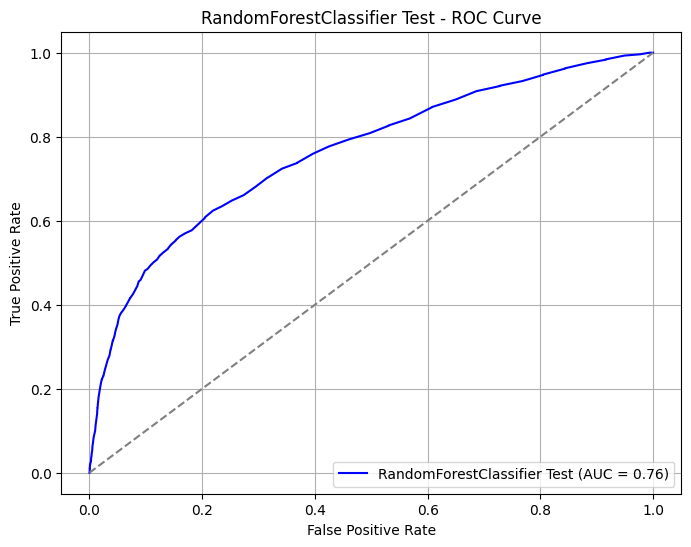

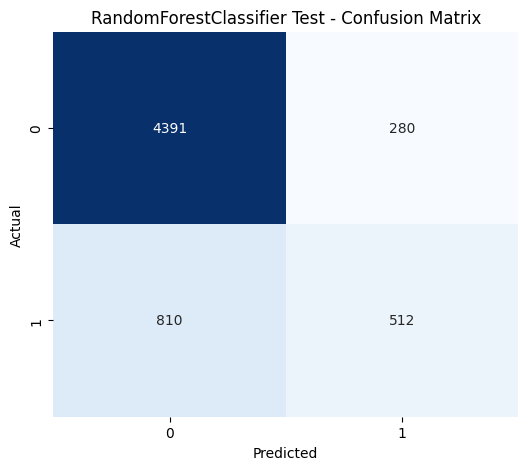




=== RandomForestClassifier Train: Classification Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18664
           1       1.00      1.00      1.00      5308

    accuracy                           1.00     23972
   macro avg       1.00      1.00      1.00     23972
weighted avg       1.00      1.00      1.00     23972

Accuracy: 0.9994, Precision: 0.9989, Recall: 0.9983, F1: 0.9986, AUC: 1.0000


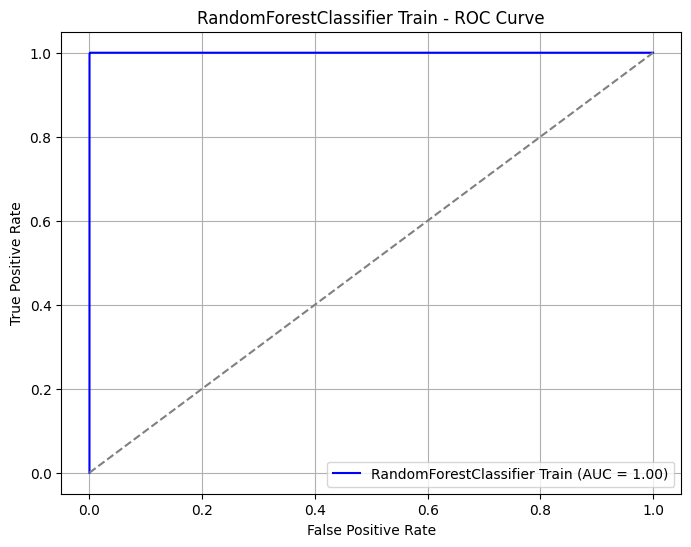

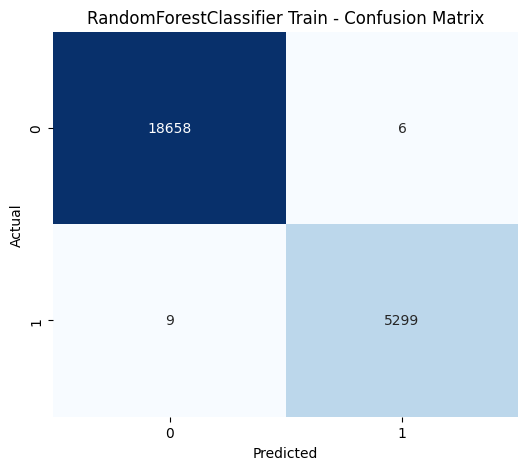




=== SVC Test: Classification Report ===
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4671
           1       0.69      0.35      0.46      1322

    accuracy                           0.82      5993
   macro avg       0.76      0.65      0.68      5993
weighted avg       0.80      0.82      0.80      5993

Accuracy: 0.8211, Precision: 0.6855, Recall: 0.3495, F1: 0.4629, AUC: 0.7198


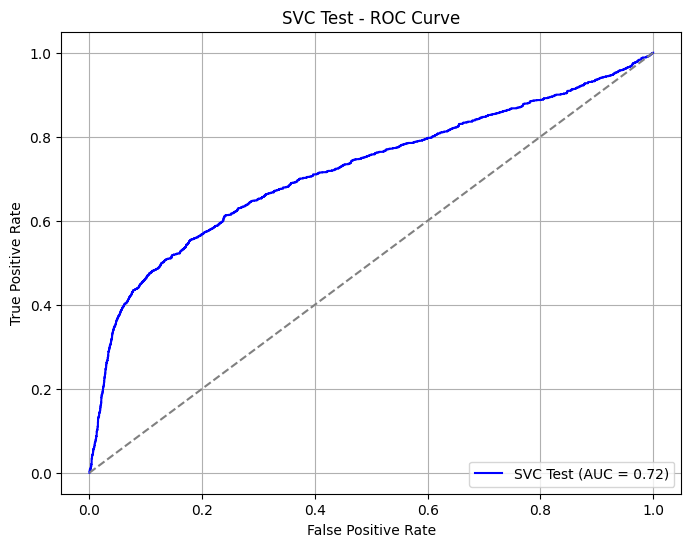

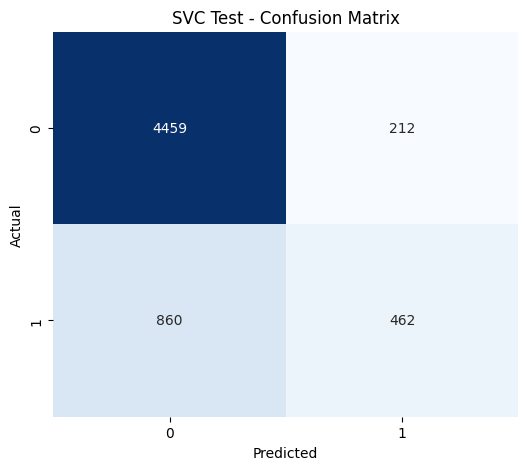




=== SVC Train: Classification Report ===
              precision    recall  f1-score   support

           0       0.84      0.96      0.89     18664
           1       0.70      0.35      0.47      5308

    accuracy                           0.82     23972
   macro avg       0.77      0.66      0.68     23972
weighted avg       0.81      0.82      0.80     23972

Accuracy: 0.8235, Precision: 0.7007, Recall: 0.3542, F1: 0.4705, AUC: 0.7635


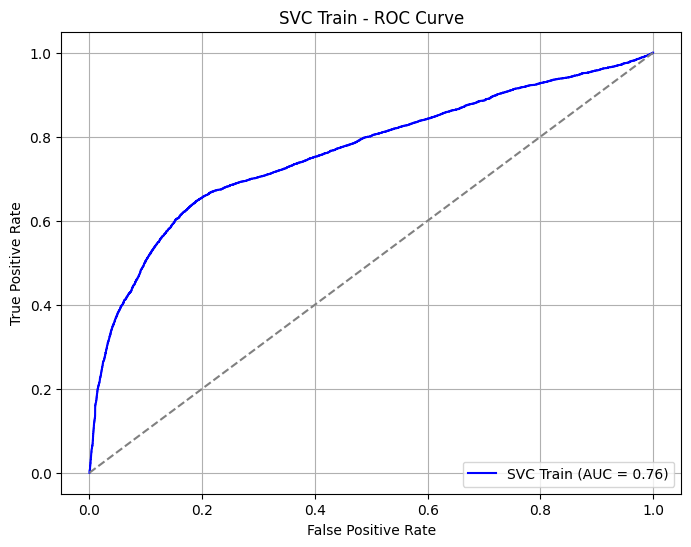

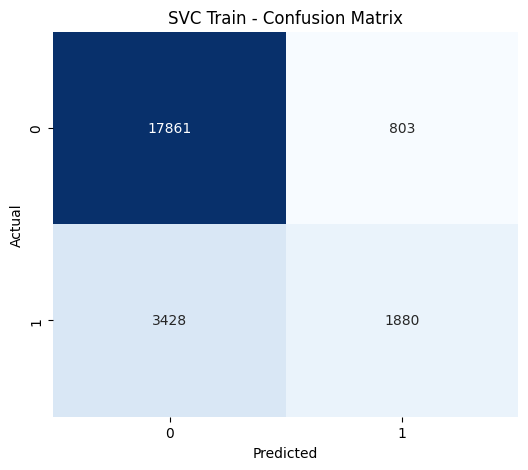

In [31]:
for name, model in models.items():
    model.fit(X_train, y_train)
    
    y_test_pred = model.predict(X_test)
    y_test_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    test_metrics = print_and_log_metrics(name, y_test, y_test_pred, y_test_proba, test_metrics, train_or_test='Test')
    
    y_train_pred = model.predict(X_train)
    y_train_proba = model.predict_proba(X_train)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_train)
    train_metrics = print_and_log_metrics(name, y_train, y_train_pred, y_train_proba, train_metrics, train_or_test='Train')

## Excersice 3

### Check the distribution of the target class

In [32]:
df['default.payment.next.month'].value_counts()

default.payment.next.month
0    23335
1     6630
Name: count, dtype: int64

### Apply SMOTE to balance the dataset

In [33]:
smote = SMOTE()

In [34]:
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
X_train_sm.shape, y_train_sm.shape

((37328, 23), (37328,))

In [35]:
y_train_sm.value_counts()

default.payment.next.month
1    18664
0    18664
Name: count, dtype: int64

### Retrain all the mdoels on the balanced dataset.

In [36]:
smot_models = {
    'LogisticRegression' : LogisticRegression(random_state=10),
    'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=14),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=10),
    'RandomForestClassifier': RandomForestClassifier(random_state=10),
    'SVC': SVC(random_state=10)
}

In [37]:
smot_train_metrics = pd.DataFrame(columns=[
    "Model","y_true","y_predicted","y_proba","Accuracy",
    "Precision","Recall","F1 Score","ROC AUC","Comfusion Matrix"
])
smot_test_metrics = pd.DataFrame(columns=[
    "Model","y_true","y_predicted","y_proba","Accuracy",
    "Precision","Recall","F1 Score","ROC AUC","Comfusion Matrix"
])

=== LogisticRegression Test: Classification Report ===
              precision    recall  f1-score   support

           0       0.87      0.70      0.78      4671
           1       0.38      0.65      0.48      1322

    accuracy                           0.69      5993
   macro avg       0.63      0.67      0.63      5993
weighted avg       0.76      0.69      0.71      5993

Accuracy: 0.6861, Precision: 0.3766, Recall: 0.6452, F1: 0.4756, AUC: 0.7199


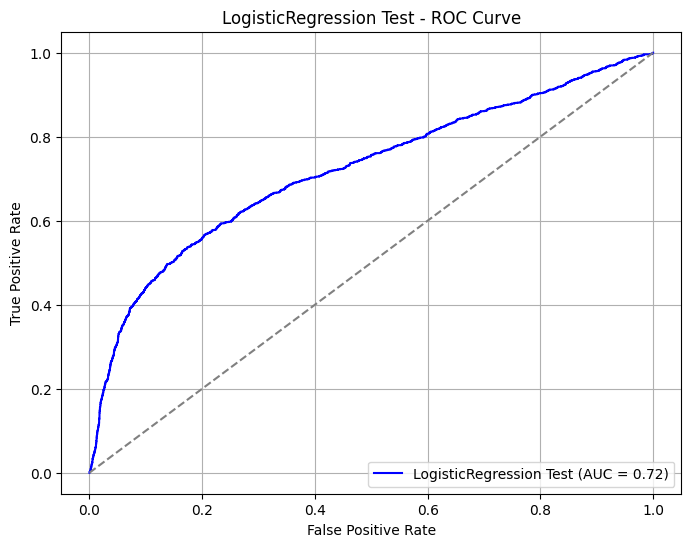

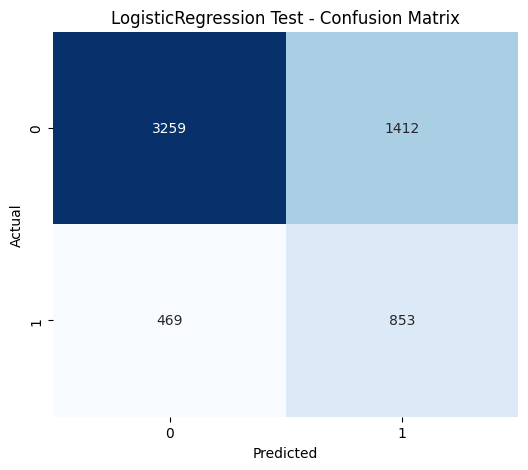




=== LogisticRegression Train: Classification Report ===
              precision    recall  f1-score   support

           0       0.67      0.70      0.68     18664
           1       0.68      0.66      0.67     18664

    accuracy                           0.68     37328
   macro avg       0.68      0.68      0.68     37328
weighted avg       0.68      0.68      0.68     37328

Accuracy: 0.6783, Precision: 0.6845, Recall: 0.6616, F1: 0.6729, AUC: 0.7407


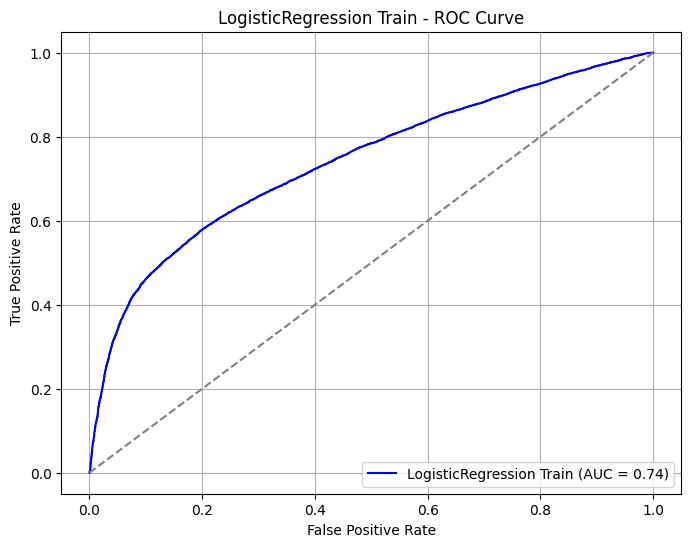

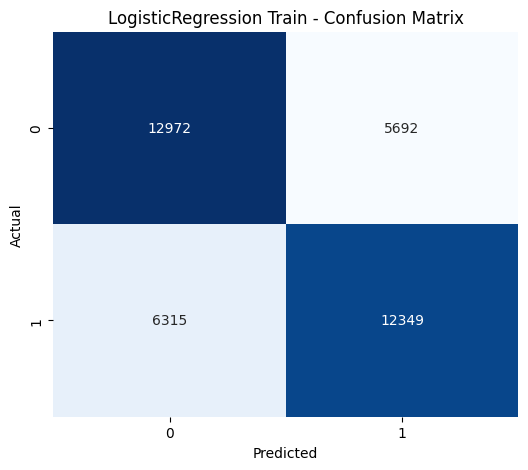




=== KNeighborsClassifier Test: Classification Report ===
              precision    recall  f1-score   support

           0       0.87      0.71      0.78      4671
           1       0.38      0.63      0.48      1322

    accuracy                           0.69      5993
   macro avg       0.63      0.67      0.63      5993
weighted avg       0.76      0.69      0.72      5993

Accuracy: 0.6936, Precision: 0.3828, Recall: 0.6346, F1: 0.4775, AUC: 0.7342


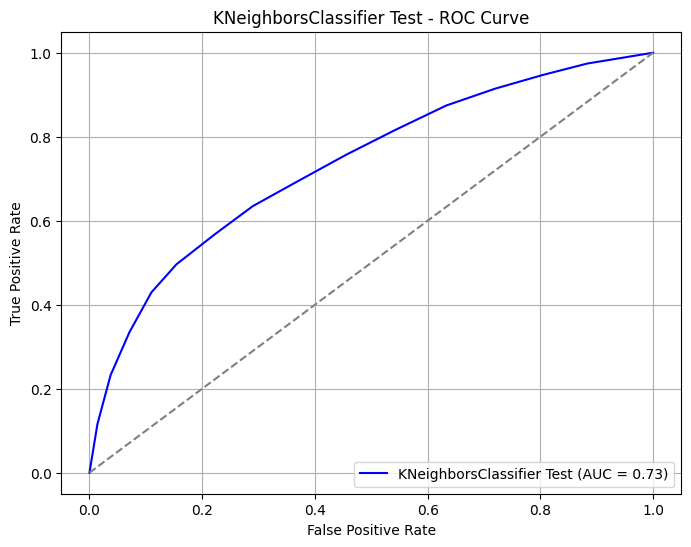

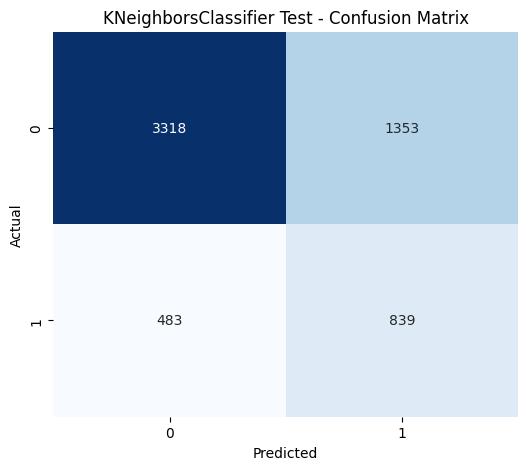




=== KNeighborsClassifier Train: Classification Report ===
              precision    recall  f1-score   support

           0       0.83      0.76      0.79     18664
           1       0.77      0.84      0.81     18664

    accuracy                           0.80     37328
   macro avg       0.80      0.80      0.80     37328
weighted avg       0.80      0.80      0.80     37328

Accuracy: 0.7981, Precision: 0.7747, Recall: 0.8407, F1: 0.8063, AUC: 0.8886


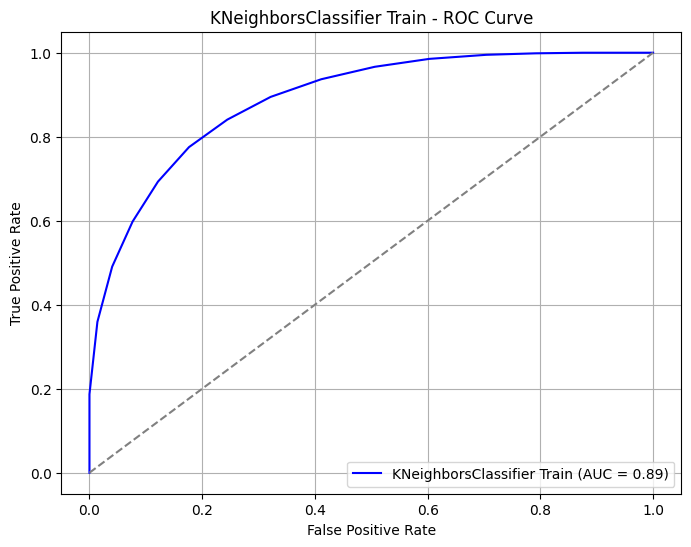

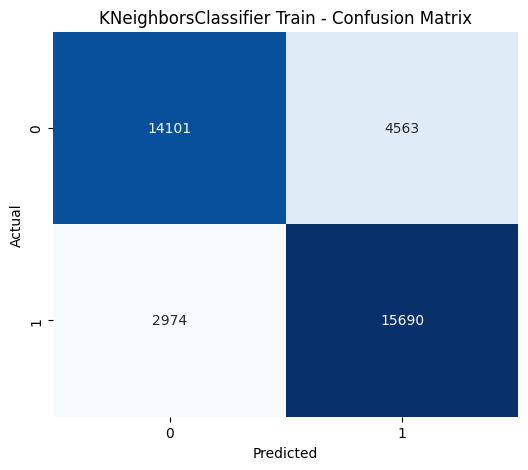




=== DecisionTreeClassifier Test: Classification Report ===
              precision    recall  f1-score   support

           0       0.84      0.75      0.79      4671
           1       0.35      0.48      0.41      1322

    accuracy                           0.69      5993
   macro avg       0.60      0.62      0.60      5993
weighted avg       0.73      0.69      0.71      5993

Accuracy: 0.6925, Precision: 0.3547, Recall: 0.4811, F1: 0.4083, AUC: 0.6165


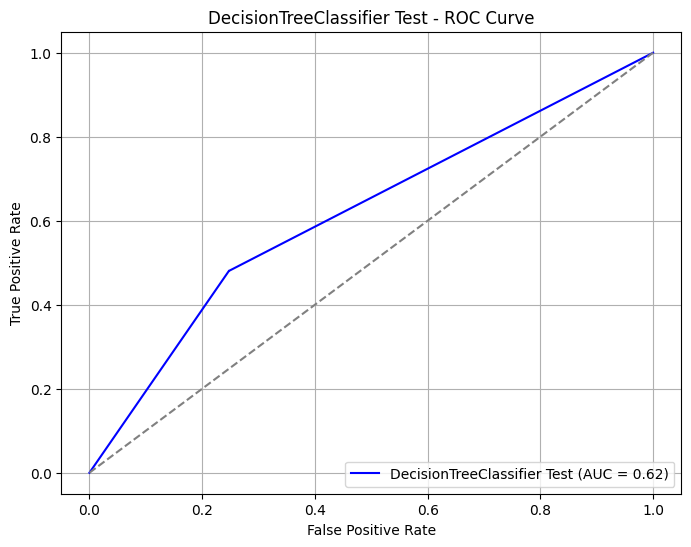

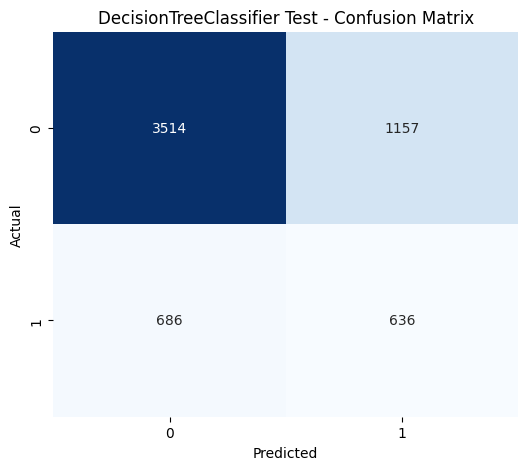




=== DecisionTreeClassifier Train: Classification Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18664
           1       1.00      1.00      1.00     18664

    accuracy                           1.00     37328
   macro avg       1.00      1.00      1.00     37328
weighted avg       1.00      1.00      1.00     37328

Accuracy: 0.9996, Precision: 1.0000, Recall: 0.9992, F1: 0.9996, AUC: 1.0000


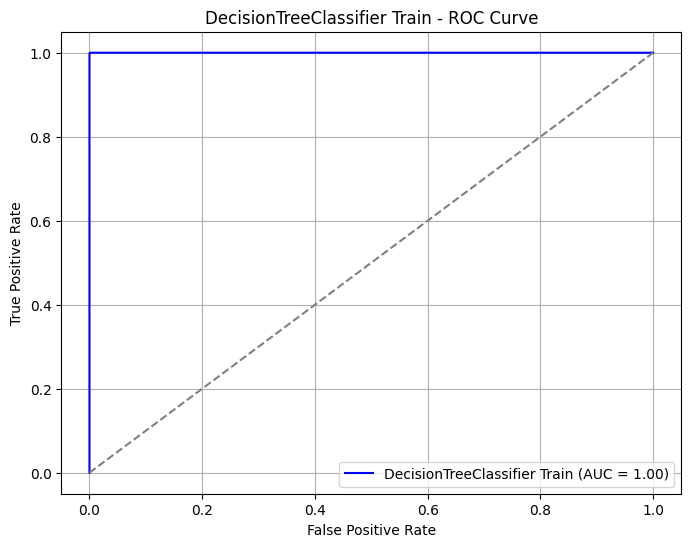

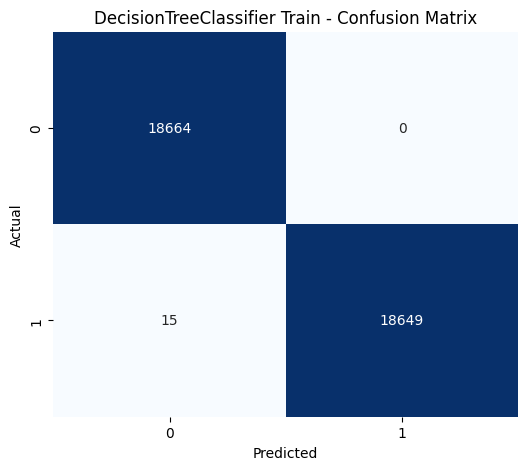




=== RandomForestClassifier Test: Classification Report ===
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      4671
           1       0.53      0.52      0.53      1322

    accuracy                           0.79      5993
   macro avg       0.70      0.70      0.70      5993
weighted avg       0.79      0.79      0.79      5993

Accuracy: 0.7928, Precision: 0.5307, Recall: 0.5234, F1: 0.5270, AUC: 0.7604


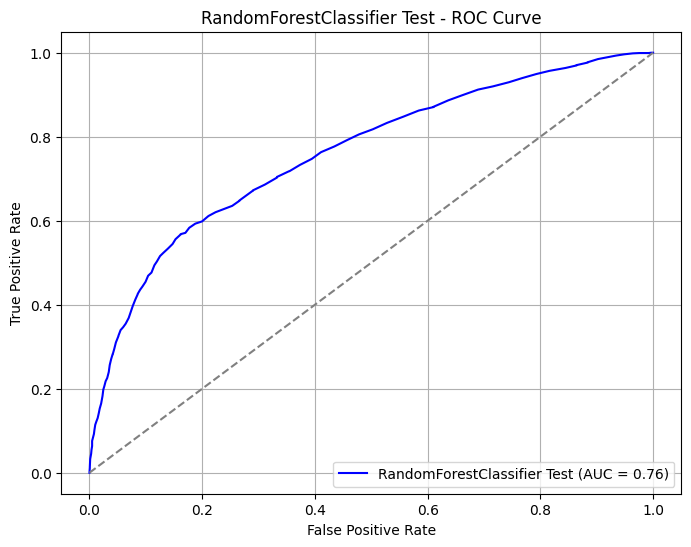

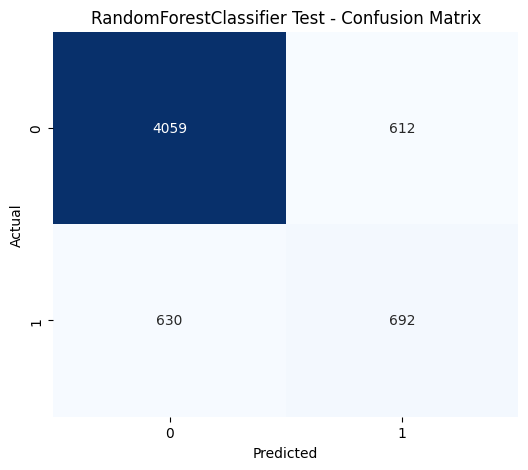




=== RandomForestClassifier Train: Classification Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18664
           1       1.00      1.00      1.00     18664

    accuracy                           1.00     37328
   macro avg       1.00      1.00      1.00     37328
weighted avg       1.00      1.00      1.00     37328

Accuracy: 0.9996, Precision: 0.9996, Recall: 0.9996, F1: 0.9996, AUC: 1.0000


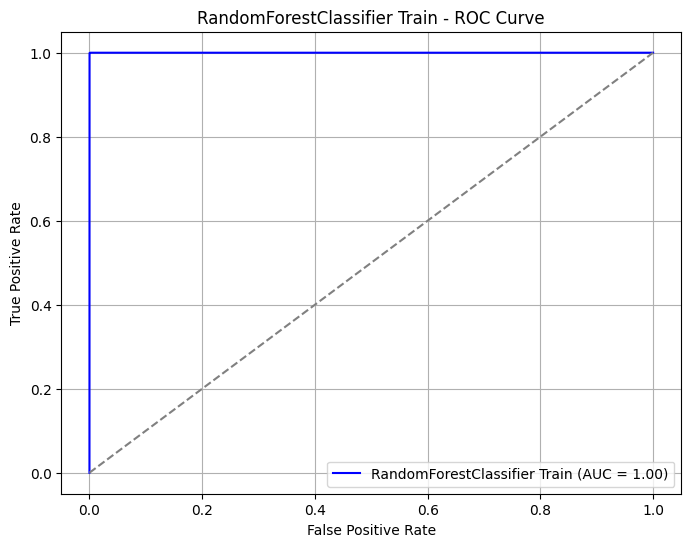

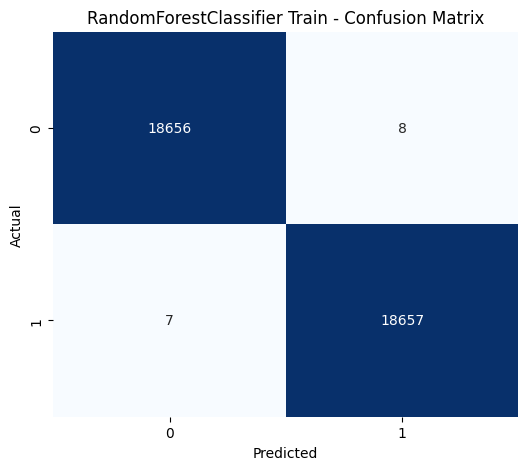




=== SVC Test: Classification Report ===
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      4671
           1       0.50      0.57      0.53      1322

    accuracy                           0.78      5993
   macro avg       0.68      0.70      0.69      5993
weighted avg       0.79      0.78      0.78      5993

Accuracy: 0.7772, Precision: 0.4957, Recall: 0.5651, F1: 0.5281, AUC: 0.7591


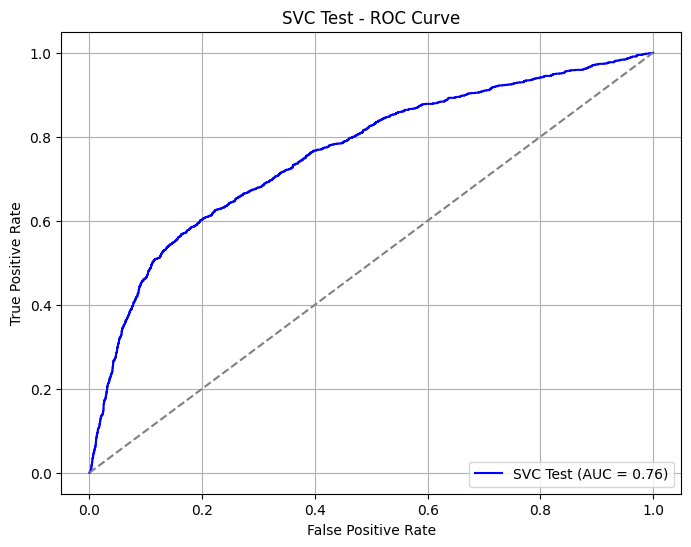

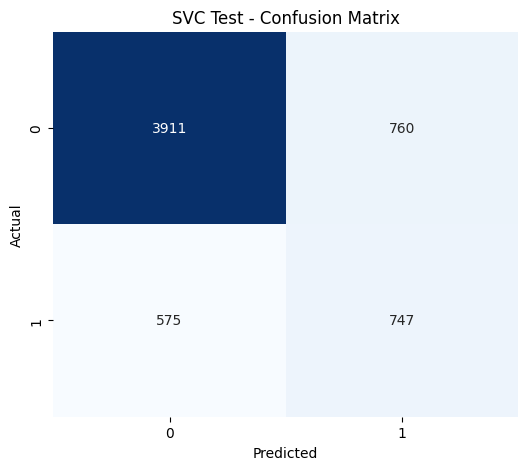




=== SVC Train: Classification Report ===
              precision    recall  f1-score   support

           0       0.67      0.85      0.75     18664
           1       0.79      0.59      0.67     18664

    accuracy                           0.72     37328
   macro avg       0.73      0.72      0.71     37328
weighted avg       0.73      0.72      0.71     37328

Accuracy: 0.7156, Precision: 0.7916, Recall: 0.5854, F1: 0.6730, AUC: 0.7946


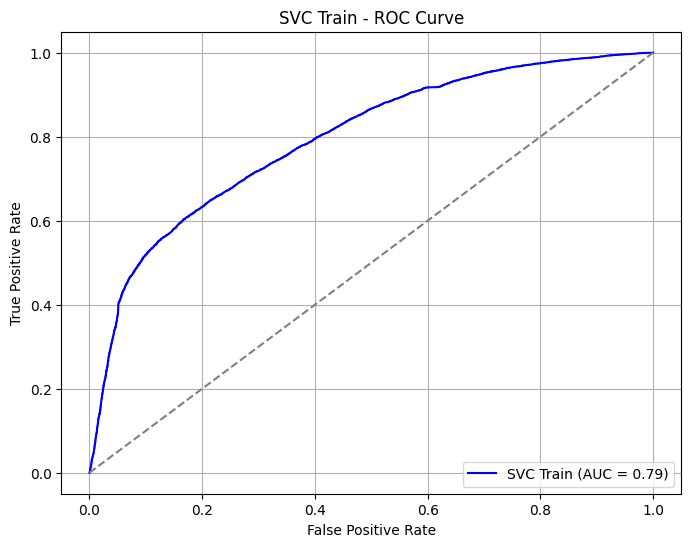

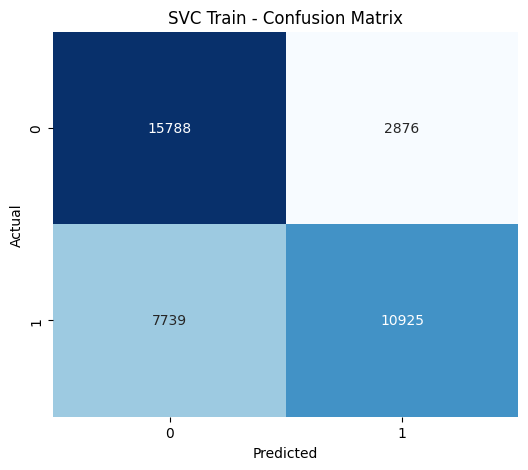

In [38]:
for name, model in models.items():
    model.fit(X_train_sm, y_train_sm)
    
    y_test_pred = model.predict(X_test)
    y_test_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    smot_test_metrics = print_and_log_metrics(name, y_test, y_test_pred, y_test_proba, smot_test_metrics, train_or_test='Test')
    
    y_train_pred = model.predict(X_train_sm)
    y_train_proba = model.predict_proba(X_train_sm)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_train_sm)
    smot_train_metrics = print_and_log_metrics(name, y_train_sm, y_train_pred, y_train_proba, smot_train_metrics, train_or_test='Train')

## Exercise 4: Model Comparison Table

### Table A: Performance Before SMOTE

In [39]:
train_metrics[['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']]

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,LogisticRegression,0.810612,0.714047,0.241334,0.360743,0.721070
1,KNeighborsClassifier,0.823878,0.711449,0.344197,0.463941,0.826380
2,DecisionTreeClassifier,0.999374,1.000000,0.997174,0.998585,0.999999
3,RandomForestClassifier,0.999374,0.998869,0.998304,0.998587,0.999998
4,SVC,0.823502,0.700708,0.354182,0.470529,0.763467


In [40]:
test_metrics[['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']]

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,LogisticRegression,0.810112,0.705357,0.239032,0.357062,0.718281
1,KNeighborsClassifier,0.813950,0.656581,0.328290,0.437721,0.743154
2,DecisionTreeClassifier,0.720007,0.374824,0.403177,0.388484,0.606605
3,RandomForestClassifier,0.818121,0.646465,0.387292,0.484390,0.763111
4,SVC,0.821125,0.685460,0.349470,0.462926,0.719810


### Table B: Performance After SMOTE

In [41]:
smot_train_metrics[['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']]

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,LogisticRegression,0.678338,0.684496,0.661648,0.672878,0.740660
1,KNeighborsClassifier,0.798087,0.774700,0.840656,0.806331,0.888562
2,DecisionTreeClassifier,0.999598,1.000000,0.999196,0.999598,1.000000
3,RandomForestClassifier,0.999598,0.999571,0.999625,0.999598,1.000000
4,SVC,0.715629,0.791609,0.585351,0.673032,0.794573


In [42]:
smot_test_metrics[['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']]

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,LogisticRegression,0.686134,0.376600,0.645234,0.475606,0.719878
1,KNeighborsClassifier,0.693643,0.382755,0.634644,0.477518,0.734176
2,DecisionTreeClassifier,0.692475,0.354713,0.481089,0.408347,0.616529
3,RandomForestClassifier,0.792758,0.530675,0.523449,0.527037,0.760379
4,SVC,0.777240,0.495687,0.565053,0.528102,0.759112


## Knowledge Check Questions

### 1. Why is Recall important in a credit default scenario?

Recall measures how many actual defaulters are correctly identified. In credit risk, missing a defaulter (false negative) is very costly because the bank may give a loan to someone who won’t repay. High recall ensures most risky clients are flagged, even if it means tolerating some false alarms.

### 2. What is the ROC curve and what does AUC signify? 

The ROC curve plots True Positive Rate (Recall) vs. False Positive Rate at different threshold settings. It shows the trade-off between catching positives and avoiding false alarms.  

AUC (Area Under Curve) is a single number summarizing performance:  
AUC = 0.5 → no better than random guessing.  
AUC = 1.0 → perfect classifier.  
Higher AUC means the model discriminates better between default and non-default cases.

### 3. How does SMOTE handle class imbalance?

SMOTE (Synthetic Minority Over-sampling Technique) generates new synthetic samples for the minority class. It picks a minority example, finds its nearest neighbors, and interpolates to create similar but not identical samples. This balances the dataset and helps the model learn minority patterns without just duplicating rows.

### 4. When would you prefer Random Forest over Logistic Regression?

Random Forest is better when:
- The data has non-linear relationships and complex interactions.
- You want robustness and can tolerate less interpretability.
- You need good performance with minimal feature engineering.

Logistic Regression is preferred when:
- The relationship is mostly linear.
- You need a simple, interpretable model with coefficients.
- Speed and low resource use matter.

### 5. What are the pros and cons of using KNN for classification tasks?

Pros
- Simple and intuitive, no training phase.
- Works well with small datasets.
- Naturally handles multi-class problems.

Cons
- Prediction is slow on large datasets (needs distance calculation for all points).
- Sensitive to irrelevant features and scaling (needs normalization).
- Choice of k strongly affects performance; no universal best value.